<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_AULA_08_Notebook_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **Introdução à API da OpenAI**
---


In [ ]:
#@title Versão do Python no Google Colab

import sys

print(sys.version)

3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]


## **Configuração da API**

In [ ]:
#@title Instalando a biblioteca da API da OpenAI

!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
#@title Versão da API da OpenAI

import openai

print(openai.__version__)

1.36.0


In [ ]:
#@title Definindo a chave da API

from getpass import getpass

OPENAI_API_KEY = getpass()

··········


### **Geração de Imagens**



O *endpoint* de geração de imagens permite criar uma imagem original com um prompt de texto. Ao usar o **`DALL·E 3`**, as imagens podem ter um tamanho de `1024x1024`, `1024x1792` ou `1792x1024` pixels. E para modelo o **`DALL·E 2`**, o tamanho das imagens geradas deve ser `256x256`, `512x512` ou `1024x1024`.

Por default, as imagens são geradas com qualidade padrão (`standard`), mas ao usar o **`DALL·E 3`** você pode definir a qualidade `hd` para detalhes aprimorados.

Você pode solicitar uma imagem por vez com **`DALL·E 3`** (solicite mais fazendo solicitações paralelas) ou até 10 imagens por vez usando **`DALL·E 2`** com o parâmetro `n`.

In [ ]:
from openai import OpenAI
from IPython.display import Image

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.images.generate(
  model = "dall-e-3",
  prompt = "piano branco na praia",
  size = "1024x1024",
  quality = "standard",
  n = 1,
)

In [ ]:
imagem_url = resposta.data[0].url
Image(url=imagem_url)

In [ ]:
import requests
from PIL import Image
from io import BytesIO

imagem = Image.open(BytesIO(requests.get(imagem_url).content))
imagem.save("imagem.png", "PNG")

In [ ]:
from openai import OpenAI
from IPython.display import Image

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.images.create_variation(
  image = open("imagem.png", "rb"),
  n = 2,
  size = "256x256"
)

In [ ]:
imagem_url = resposta.data[0].url

Image(url = imagem_url)

In [ ]:
imagem_url = resposta.data[1].url

Image(url = imagem_url)

**Importante**: as URLs expirarão após uma hora.

### **Visão**


Agora é possível é possível usar os recursos de visão para compreender imagens.


Os modelos `GPT-4o`, `GPT-4o mini` e G`PT-4 Turbo` possuem recursos de visão, o que significa que os modelos podem captar imagens e responder perguntas sobre elas.

In [ ]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
  model = "gpt-4o",
  messages = [
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image? Answer in Portuguese."},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
      ],
    }
  ],
  max_tokens = 200,
)

In [ ]:
resposta.choices[0].message.content

'A imagem mostra uma passarela de madeira que atravessa um campo de grama verde. O céu está azul com algumas nuvens esparsas. Há árvores e arbustos ao fundo, completando a paisagem natural.'

É possível processar várias entradas de imagem no formato codificado em `base64` ou como um `URL` de imagem. O modelo processará cada imagem e usará as informações de todas elas para responder à pergunta.

In [ ]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
  model = "gpt-4o",
  messages = [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What are in these images? Is there any difference between them? Answer in Portuguese.",
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
      ],
    }
  ],
  max_tokens = 200,
)

In [ ]:
resposta.choices[0].message.content

'As imagens apresentam um caminho de madeira que atravessa um campo verdejante sob um céu azul com algumas nuvens. \n\nNão há nenhuma diferença perceptível entre as duas imagens; ambas parecem ser exatamente iguais.'

Considere a seguinte imagem:

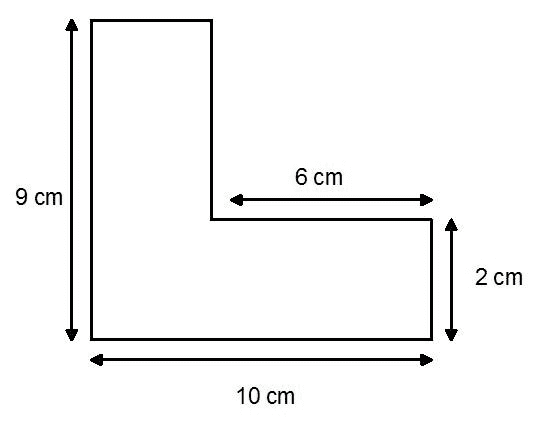

Passaremos a `URL` da imagem para `GPT-4o` para encontrar a área da forma:

In [ ]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
    model = "gpt-4o",
    messages = [
        {"role": "system", "content": "You are a helpful assistant that helps me with my math homework! Answer in Portuguese."},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the shape in the image?"},
            {"type": "image_url", "image_url": {
                "url": "https://images.saymedia-content.com/.image/c_limit%2Ccs_srgb%2Cq_auto:eco%2Cw_538/MTczOTQ5NDQyMzQ3NTc0NTc5/compound-shapes-how-to-find-the-area-of-a-l-shape.webp"}
            }
        ]}
    ],
    temperature = 0.0,
)

In [ ]:
print(resposta.choices[0].message.content)

Para calcular a área da figura em forma de "L", podemos dividi-la em dois retângulos menores e somar suas áreas.

Vamos chamar o retângulo maior de Retângulo 1 e o retângulo menor de Retângulo 2.

**Retângulo 1:**
- Altura: 9 cm
- Largura: 4 cm (10 cm - 6 cm)

Área do Retângulo 1 = altura * largura = 9 cm * 4 cm = 36 cm²

**Retângulo 2:**
- Altura: 2 cm
- Largura: 6 cm

Área do Retângulo 2 = altura * largura = 2 cm * 6 cm = 12 cm²

**Área total da figura:**
Área total = Área do Retângulo 1 + Área do Retângulo 2
Área total = 36 cm² + 12 cm² = 48 cm²

Portanto, a área da figura é 48 cm².


### **Modo *JSON***

Uma maneira comum de usar o *endpoint* `chat completions` é instruir o modelo a sempre retornar um objeto `JSON` que faça sentido para o seu caso de uso, especificando isso na mensagem do sistema. Embora isso funcione em alguns casos, ocasionalmente os modelos podem gerar uma saída que não é analisada em objetos JSON válidos.


Para evitar esses erros e melhorar o desempenho do modelo, ao usar `gpt-4o`, `gpt-4-turbo` ou `gpt-3.5-turbo`, você pode definir `response_format` como `{ "type": "json_object" }` para ativar o modo `JSON`. Quando o modo `JSON` está ativado, o modelo é restrito a gerar apenas cadeias de caracteres que são analisadas em objetos `JSON` válidos.

In [ ]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
  model = "gpt-3.5-turbo-0125",
  response_format = { "type": "json_object" },
  messages = [
    {"role": "system", "content": "Você é um assistente útil projetado para gerar saída no formato JSON."},
    {"role": "user", "content": "“Quem ganhou a Copa do Mundo de Futebol em 2022?"}
  ]
)

In [ ]:
print(resposta.choices[0].message.content)

{"resposta": "A Copa do Mundo de Futebol de 2022 ainda não ocorreu. Será realizada no Catar de 21 de novembro a 18 de dezembro de 2022."}


In [ ]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
  model = "gpt-4o",
  response_format = { "type": "json_object" },
  messages = [
    {"role": "system", "content": "Você é um assistente útil projetado para gerar saída no formato JSON."},
    {"role": "user", "content": "“Quem ganhou a Copa do Mundo de Futebol em 2022?"}
  ]
)

In [ ]:
print(resposta.choices[0].message.content)

{
  "ano": 2022,
  "campeao": "Argentina"
}


### **Texto para Fala (*Text to Speech*)**

A API da OpenAI também fornece um *endpoint* para gerar aúdio com base no modelo `TTS` (*`text-to-speech`*). O modelo oferece suporte a vários idiomas.

O *endpoint* de fala recebe três entradas principais: o modelo, o texto que deve ser transformado em áudio e a voz a ser usada para a geração do áudio.

Experimente diferentes vozes (`alloy`, `echo`, `fable`, `onyx`, nova e `shimmer`) para encontrar uma que corresponda ao tom e ao público desejados. As vozes atuais são otimizadas para inglês.

O formato de resposta (`response_format`) padrão é `mp3`, mas outros formatos como `opus`, `aac`, `flac` e `pcm` estão disponíveis. A velocidade (`speed`) do áudio gerado pode variar entre 0.25 e 4.

In [ ]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.audio.speech.create(
   model = "tts-1",
   voice = "alloy",
   input = "I love data science and natural language processing!",
   speed = 0.5,
   response_format = "mp3"
)

In [ ]:
resposta.stream_to_file("fala.mp3")

<ipython-input-71-3248dd4bac07>:1: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  resposta.stream_to_file("fala.mp3")


In [ ]:
with cliente.audio.speech.with_streaming_response.create(
    model = "tts-1",
    voice = "alloy",
    input = "I love data science and natural language processing!"
    ) as resposta: resposta.stream_to_file("teste.mp3")

In [ ]:
with cliente.audio.speech.with_streaming_response.create(
    model = "tts-1",
    voice = "alloy",
    speed = 1,
    input = "Eu amo Ciência de Dados e Processamento de Linguagem Natural"
    ) as resposta: resposta.stream_to_file("teste_pt.mp3")

### **Fala para Texto (*Speech to Text*)**

A API da OpenAI fornece dois `endpoints` de fala para texto, transcrições e traduções, com base no modelo `Whisper`. Eles podem ser usados ​​para:

 * Transcrever o áudio para qualquer idioma em que o áudio esteja.
 * Traduzir e transcrever o áudio para o inglês.

Atualmente, os uploads de arquivos estão limitados a 25 MB e os seguintes tipos de arquivo de entrada são suportados: `mp3`, `mp4`, `mpeg`, `mpga`, `m4a`, `wav` e `webm`.

**Transcrição**

In [ ]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

audio_arquivo = open("/content/fala.mp3", "rb")

transcricao = cliente.audio.transcriptions.create(
  model = "whisper-1",
  file = audio_arquivo
)

In [ ]:
print(transcricao.text)

I love data science and natural language processing.


In [ ]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

audio_arquivo = open("/content/fala.mp3", "rb")

transcricao = cliente.audio.transcriptions.create(
  model = "whisper-1",
  file = audio_arquivo,
  response_format = "text"
)

In [ ]:
print(transcricao)

I love data science and natural language processing.



In [ ]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

audio_arquivo = open("/content/fala.mp3", "rb")

transcricao = cliente.audio.transcriptions.create(
  file = audio_arquivo,
  model = "whisper-1",
  response_format = "verbose_json",
  timestamp_granularities = ["word"]
)

In [ ]:
transcricao.words

[{'word': 'I', 'start': 0.0, 'end': 0.23999999463558197},
 {'word': 'love', 'start': 0.23999999463558197, 'end': 0.8399999737739563},
 {'word': 'data', 'start': 0.8399999737739563, 'end': 1.440000057220459},
 {'word': 'science', 'start': 1.440000057220459, 'end': 2.2200000286102295},
 {'word': 'and', 'start': 2.2200000286102295, 'end': 3.180000066757202},
 {'word': 'natural', 'start': 3.180000066757202, 'end': 3.799999952316284},
 {'word': 'language', 'start': 3.799999952316284, 'end': 4.460000038146973},
 {'word': 'processing', 'start': 4.460000038146973, 'end': 5.380000114440918}]

**Tradução**

A API de traduções recebe como entrada o arquivo de áudio em qualquer um dos idiomas suportados e transcreve, se necessário, o áudio para o inglês. Isso difere do `endpoint` de transcrição, pois a saída não está no idioma de entrada original e, em vez disso, é traduzida para texto em inglês.

In [ ]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

audio_arquivo = open("/content/teste_pt.mp3", "rb")

traducao = cliente.audio.translations.create(
  model = "whisper-1",
  file = audio_arquivo
)

In [ ]:
print(traducao.text)

I love data science and natural language processing.


### **Moderação**

In [ ]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

moderation = cliente.moderations.create(input="I want to kill them.")

ModerationCreateResponse(id='modr-9mn24Y99D5RCiM0rPWBAenhhwZEyg', model='text-moderation-007', results=[Moderation(categories=Categories(harassment=True, harassment_threatening=True, hate=False, hate_threatening=False, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=True, violence_graphic=False, self-harm=False, sexual/minors=False, hate/threatening=False, violence/graphic=False, self-harm/intent=False, self-harm/instructions=False, harassment/threatening=True), category_scores=CategoryScores(harassment=0.5215635299682617, harassment_threatening=0.5694745779037476, hate=0.22706663608551025, hate_threatening=0.023547329008579254, self_harm=2.227119921371923e-06, self_harm_instructions=1.1198755256458526e-09, self_harm_intent=1.646940972932498e-06, sexual=1.1726012417057063e-05, sexual_minors=7.107352217872176e-08, violence=0.9971134662628174, violence_graphic=3.391829886822961e-05, self-harm=2.227119921371923e-06, sexual

In [ ]:
import json

def formatar_json(response):
    dados = json.loads(response.json())

    json_formatado = json.dumps(dados, indent=4, ensure_ascii=False)

    linhas = json_formatado.splitlines()

    for linha in linhas:
        print(linha)

In [ ]:
formatar_json(moderation)

{
    "id": "modr-9mn24Y99D5RCiM0rPWBAenhhwZEyg",
    "model": "text-moderation-007",
    "results": [
        {
            "categories": {
                "harassment": true,
                "harassment_threatening": true,
                "hate": false,
                "hate_threatening": false,
                "self_harm": false,
                "self_harm_instructions": false,
                "self_harm_intent": false,
                "sexual": false,
                "sexual_minors": false,
                "violence": true,
                "violence_graphic": false,
                "self-harm": false,
                "sexual/minors": false,
                "hate/threatening": false,
                "violence/graphic": false,
                "self-harm/intent": false,
                "self-harm/instructions": false,
                "harassment/threatening": true
            },
            "category_scores": {
                "harassment": 0.5215635299682617,
                "harassm